In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
ZERO_DIVISION_SAFE = 1e-10

In [52]:
def znormalization(ts):
    mus = ts.mean(axis = 0)
    stds = ts.std(axis = 0)
    return (ts - mus) / (stds+ZERO_DIVISION_SAFE)

In [65]:
def paa_transform(ts, n_pieces):
    """
    ts: the columns of which are time series represented by e.g. np.array
    n_pieces: M equally sized piecies into which the original ts is splitted
    """
    splitted = np.array_split(ts, n_pieces) ## along columns as we want
    return np.asarray(map(lambda xs: xs.mean(axis = 0), splitted))

In [112]:
def sax_transform(ts, n_pieces, alphabet_sz):
    """
    ts: columns of which are time serieses represented by np.array
    n_pieces: number of segments in paa transformation
    alphabet: the letters to be translated to, e.g. "abcd", "ab"
    return np.array of ts's sax transformation
    Steps:
    1. znormalize
    2. ppa
    3. find norm distribution breakpoints by scipy.stats
    4. convert ppa transformation into strings
    """
    alphabet = range(alphabet_sz)
    def translate(ts_values):
        return np.asarray([(alphabet[0] if ts_value < thrholds[0]
                else (alphabet[-1] if ts_value > thrholds[-1]
                      else alphabet[np.where(thrholds <= ts_value)[0][-1]+1]))
                           for ts_value in ts_values])
        
    ts_norm = znormalization(ts)
    thrholds = np.percentile(ts_norm,np.linspace(1./alphabet_sz, 
                                          1-1./alphabet_sz, 
                                          alphabet_sz-1)*100)
    paa_ts = paa_transform(ts_norm, n_pieces)
    return np.apply_along_axis(translate, 0, paa_ts)

In [113]:
ts1 = np.asarray([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])
ts2 = np.asarray([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72])
ts = np.asarray([ts1,ts2])
ts = ts.T
zts = znormalization(ts)
split9 = paa_transform(zts, 5)
sax_transform(ts, 9, 4)

[ 4.60666667  4.01      ]
[ 2.55078724  2.62982382]
[ 4.60666667  4.01      ]
[ 2.55078724  2.62982382]
4
tre [-0.92487787 -0.1787192   0.79282878]


array([[0, 0],
       [2, 1],
       [3, 2],
       [3, 2],
       [2, 3],
       [2, 3],
       [0, 1],
       [0, 0],
       [0, 0]])

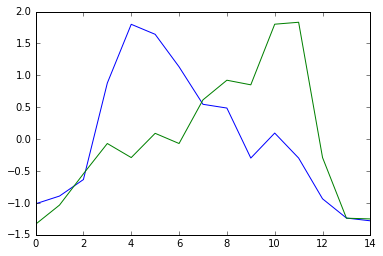

In [77]:
plt.plot(range(zts.shape[0]),zts[:,0])
plt.plot(range(zts.shape[0]),zts[:,1])

(array([ 3.,  2.,  1.,  2.,  1.,  2.,  0.,  2.,  0.,  2.]),
 array([-1.28065039, -0.97251022, -0.66437006, -0.35622989, -0.04808973,
         0.26005044,  0.5681906 ,  0.87633076,  1.18447093,  1.49261109,
         1.80075126]),
 <a list of 10 Patch objects>)

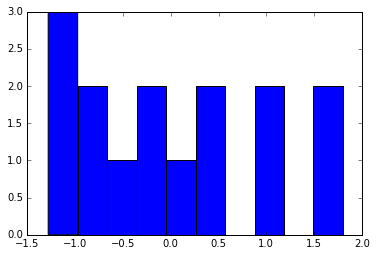

In [84]:
plt.hist(zts[:,0])

In [92]:
np.percentile(zts.flatten(),range(0,100,10))

array([-1.33469017, -1.24076753, -1.01811078, -0.71141436, -0.29664045,
       -0.1787192 ,  0.09291467,  0.56716887,  0.88837689,  1.65961836])